In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git
os.getcwd(),os.listdir('Fruit-Images-Dataset')

fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


('C:\\Users\\shivs',
 ['.git',
  'LICENSE',
  'papers',
  'readme.md',
  'src',
  'Test',
  'test-multiple_fruits',
  'Training'])

In [3]:
# Loading Training Data
X_train=[]
Y_train=[]
index_names={}
index=0
for folder in os.listdir("Fruit-Images-Dataset/Training"):
    index+=1
    index_names[index]=folder
    for img in os.listdir("Fruit-Images-Dataset/Training/"+folder):
        image=cv2.imread("Fruit-Images-Dataset/Training/"+folder+"/"+img)
        X_train.append(cv2.resize(image, (50, 50)))
        Y_train.append([index])
X_train=np.array(X_train)
Y_train=np.array(Y_train)
print("Number of training images= ",len(X_train))

Number of training images=  67692


In [4]:
# Loading Test Data
X_test=[]
Y_test=[]
index=0
for folder in os.listdir("Fruit-Images-Dataset/Test"):
    index+=1
    for img in os.listdir("Fruit-Images-Dataset/Test/"+folder):
        image=cv2.imread("Fruit-Images-Dataset/Test/"+folder+"/"+img)
        X_test.append(cv2.resize(image, (50, 50)))
        Y_test.append([index])
X_test=np.array(X_test)
Y_test=np.array(Y_test)
print("Number of test images= ",len(X_test))

Number of test images=  22688


In [5]:
X_train.shape


(67692, 50, 50, 3)

In [6]:
X_test.shape

(22688, 50, 50, 3)

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical

C:\Users\shivs\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [8]:
print("X_train.shape {}".format(X_train.shape))
print("X_test.shape {}".format(X_test.shape))
print("Y_train.shape {}".format(Y_train.shape))
print("Y_test.shape {}".format(Y_test.shape))

X_train.shape (67692, 50, 50, 3)
X_test.shape (22688, 50, 50, 3)
Y_train.shape (67692, 1)
Y_test.shape (22688, 1)


In [11]:
Y_train

array([[  1],
       [  1],
       [  1],
       ...,
       [131],
       [131],
       [131]])

In [14]:
trainX=X_train.reshape(X_train.shape[0],50,50,3)
testX=X_test.reshape(X_test.shape[0],50,50,3)
trainX=trainX.astype("float32")
testX=testX.astype("float32")

trainX/=255
testX/=255
n_class=131

print("Training images {}".format(trainX.shape))
print("Testing images {}".format(testX.shape))

print("Shape before one hot encoding",Y_train.shape)
trainY=to_categorical(Y_train)
testY=to_categorical(Y_test)
#Y_train=np_utils.to_categorical(Y_train,n_class)
#Y_test=np_utils.to_categorical(Y_test,n_class)
print("Shape after one hot encoding",trainY.shape)

Training images (67692, 50, 50, 3)
Testing images (22688, 50, 50, 3)
Shape before one hot encoding (67692, 1)
Shape after one hot encoding (67692, 132)


In [15]:
testY

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model=Sequential()
#convolution layers
model.add(Conv2D(60, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(50,50,3)))

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layers
model.add(Dense(250,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(150,activation="relu"))
model.add(Dropout(0.3))
#output layer
model.add(Dense(132,activation="softmax"))
#compiling
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.fit(trainX,trainY,batch_size=128,epochs=5,validation_data=(testX,testY))

Epoch 1/5
529/529 [==============================] - 906s 2s/step - loss: 3.0820 - accuracy: 0.2861 - val_loss: 0.3508 - val_accuracy: 0.9058
Epoch 2/5
529/529 [==============================] - 650s 1s/step - loss: 0.4726 - accuracy: 0.8447 - val_loss: 0.2424 - val_accuracy: 0.9327
Epoch 3/5
529/529 [==============================] - 611s 1s/step - loss: 0.2819 - accuracy: 0.9087 - val_loss: 0.2252 - val_accuracy: 0.9414
Epoch 4/5
529/529 [==============================] - 604s 1s/step - loss: 0.2052 - accuracy: 0.9314 - val_loss: 0.1723 - val_accuracy: 0.9501
Epoch 5/5
529/529 [==============================] - 865s 2s/step - loss: 0.1586 - accuracy: 0.9478 - val_loss: 0.1781 - val_accuracy: 0.9562


In [24]:
batch=np.array([X_test[10],X_test[867],X_test[1249],X_test[3875],X_test[7800],X_test[11570],X_test[13000],X_test[15000],X_test[16000],X_test[20000]])
labels=np.array([Y_test[10],Y_test[867],Y_test[1249],Y_test[3875],Y_test[7800],Y_test[11570],Y_test[13000],Y_test[15000],Y_test[16000],Y_test[20000]])

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 50ms/step


In [25]:
result=np.argmax(predictions,axis=-1)
print(result)


[12  6 12 24  8 22 78 89 95 63]


In [26]:
labels

array([[  1],
       [  6],
       [  8],
       [ 24],
       [ 46],
       [ 69],
       [ 78],
       [ 89],
       [ 95],
       [118]])

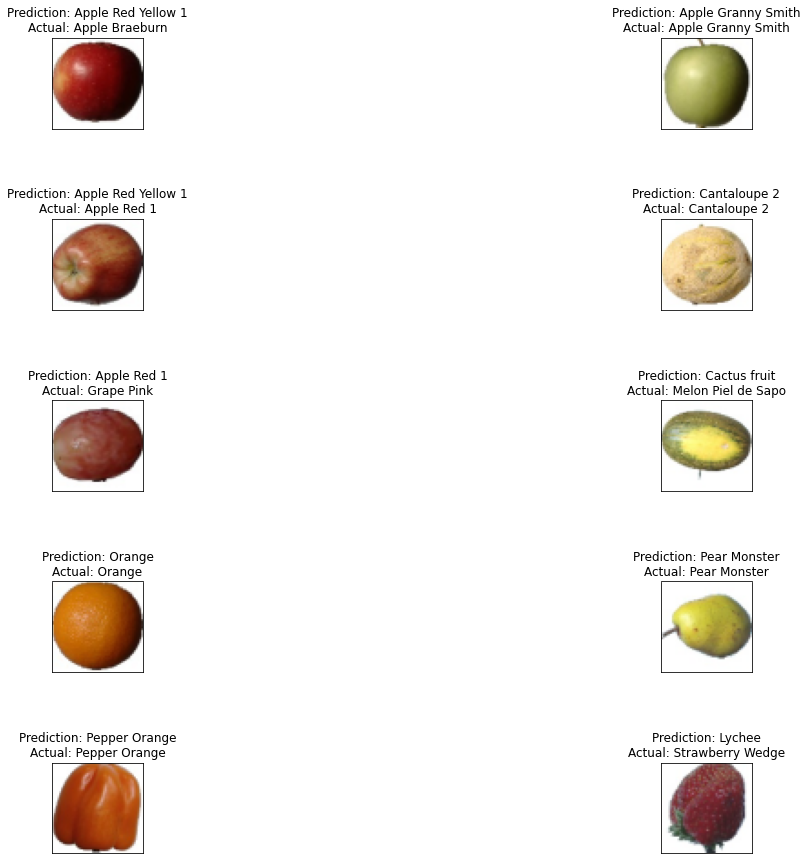

In [30]:
fig,axs =plt.subplots(5,2,figsize=(20,15))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
    for key,value in index_names.items():
        if result[i]==key:
            title="Prediction: {}\nActual: {}".format(index_names[key],index_names[int(labels[i])])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
plt.show()

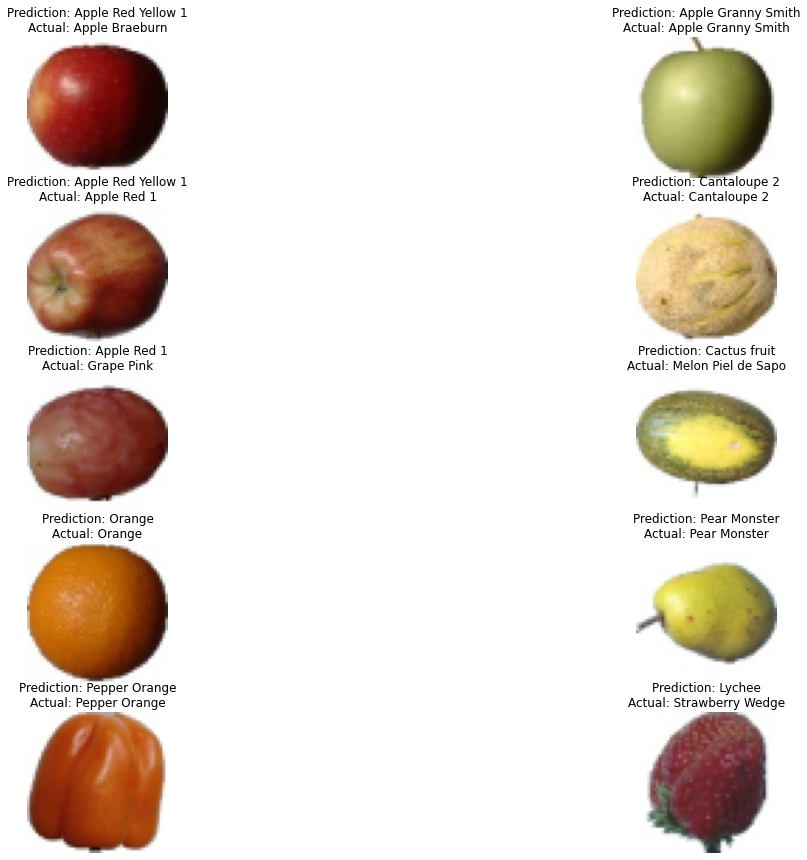

In [31]:
figure=plt.figure(figsize=(20,15))
for i,img in enumerate(batch):
    for key,value in index_names.items():
        if result[i]==key:
            title="Prediction: {}\nActual: {}".format(index_names[key],index_names[int(labels[i])])
            figure.add_subplot(5,2,(i+1))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title(title)    
plt.show()